Accuracy: 0.7412587412587412
Precision: 0.6727272727272727
Recall: 0.6607142857142857
F1 Score: 0.6666666666666666


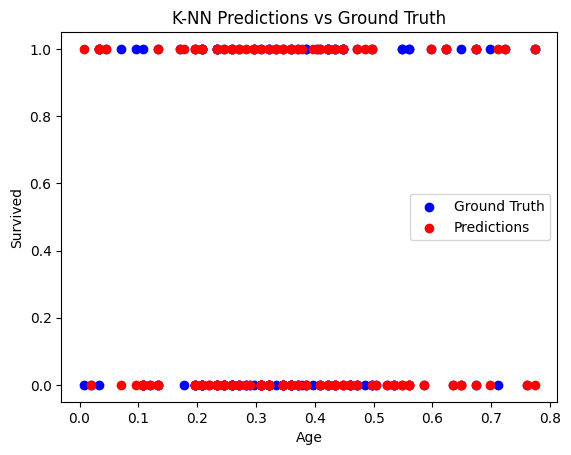

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Chargement des données
data = pd.read_csv("titanic.csv")

# Prétraitement des données
data = data.dropna(subset=["Survived", "Sex", "Age"])
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})
data["Age"] = (data["Age"] - data["Age"].min()) / (data["Age"].max() - data["Age"].min())

# Division des données en ensembles d'apprentissage et de test
X = data[["Sex", "Age"]]
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construction du modèle K-NN
k = 5  # Valeur de k pour K-NN
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualisation des résultats
# Graphique des prédictions et des véritables étiquettes
plt.scatter(X_test["Age"], y_test, color="blue", label="Ground Truth")
plt.scatter(X_test["Age"], y_pred, color="red", label="Predictions")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.legend()
plt.title("K-NN Predictions vs Ground Truth")
plt.show()


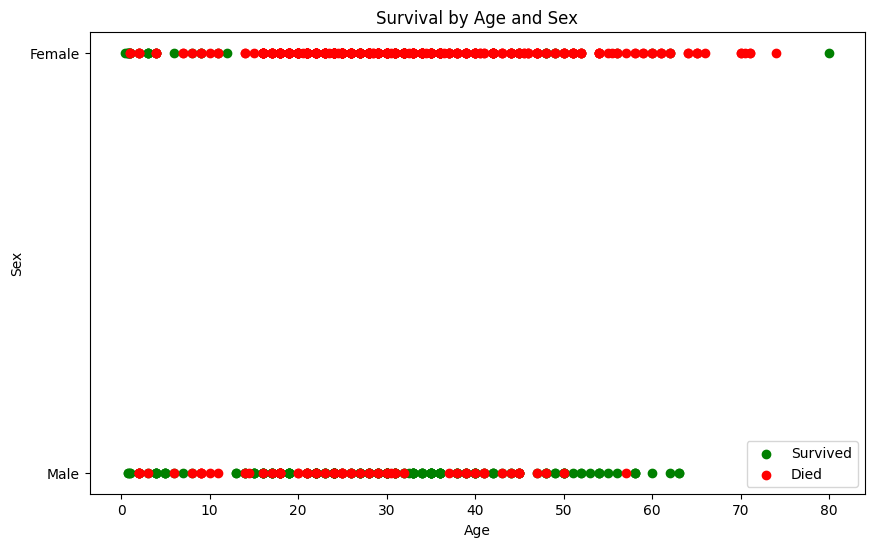

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données
data = pd.read_csv("titanic.csv")

# Prétraitement des données
data = data.dropna(subset=["Survived", "Sex", "Age"])
data["Survived"] = data["Survived"].map({0: "Died", 1: "Survived"})

# Création du graphique
plt.figure(figsize=(10, 6))
plt.scatter(data[data["Survived"] == "Survived"]["Age"], data[data["Survived"] == "Survived"]["Sex"],
            color="green", label="Survived")
plt.scatter(data[data["Survived"] == "Died"]["Age"], data[data["Survived"] == "Died"]["Sex"],
            color="red", label="Died")
plt.xlabel("Age")
plt.ylabel("Sex")
plt.yticks([0, 1], ["Male", "Female"])
plt.title("Survival by Age and Sex")
plt.legend()
plt.show()


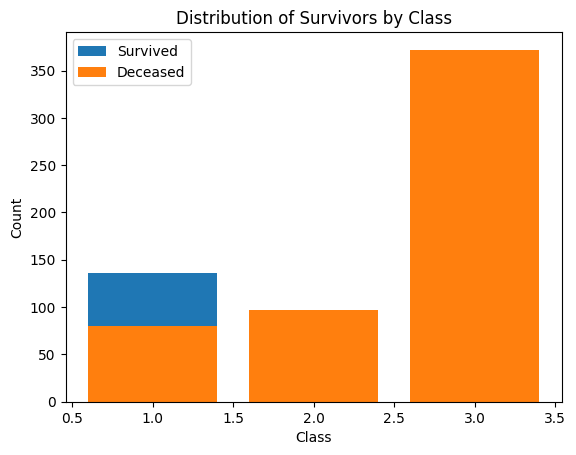

In [15]:
import matplotlib.pyplot as plt

# Chargement des données
data = pd.read_csv("titanic.csv")

# Nombre de survivants par classe
survived_by_class = data[data['Survived'] == 1]['Pclass'].value_counts()

# Nombre de décès par classe
deceased_by_class = data[data['Survived'] == 0]['Pclass'].value_counts()

# Tracé du graphique à barres
plt.bar(survived_by_class.index, survived_by_class.values, label='Survived')
plt.bar(deceased_by_class.index, deceased_by_class.values, label='Deceased')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Survivors by Class')
plt.legend()
plt.show()


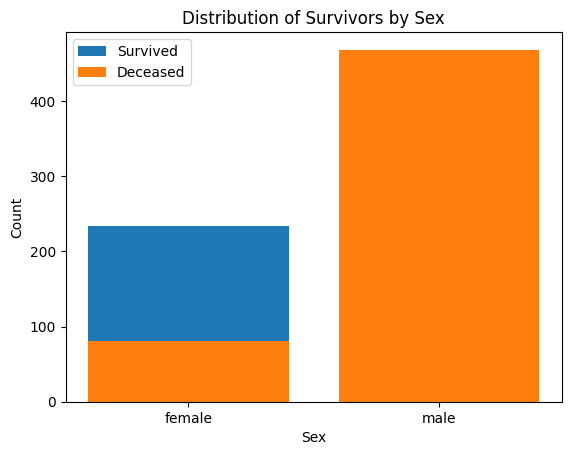

In [16]:
# Nombre de survivants par sexe
survived_by_sex = data[data['Survived'] == 1]['Sex'].value_counts()

# Nombre de décès par sexe
deceased_by_sex = data[data['Survived'] == 0]['Sex'].value_counts()

# Tracé du graphique à barres
plt.bar(survived_by_sex.index, survived_by_sex.values, label='Survived')
plt.bar(deceased_by_sex.index, deceased_by_sex.values, label='Deceased')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Survivors by Sex')
plt.legend()
plt.show()


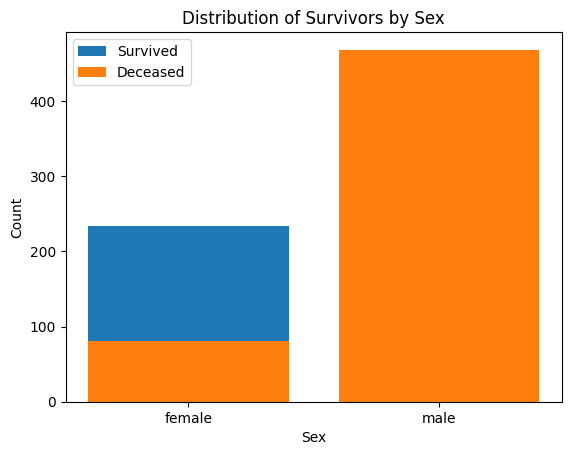

In [17]:
# Nombre de survivants par sexe
survived_by_sex = data[data['Survived'] == 1]['Sex'].value_counts()

# Nombre de décès par sexe
deceased_by_sex = data[data['Survived'] == 0]['Sex'].value_counts()

# Tracé du graphique à barres
plt.bar(survived_by_sex.index, survived_by_sex.values, label='Survived')
plt.bar(deceased_by_sex.index, deceased_by_sex.values, label='Deceased')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Survivors by Sex')
plt.legend()
plt.show()


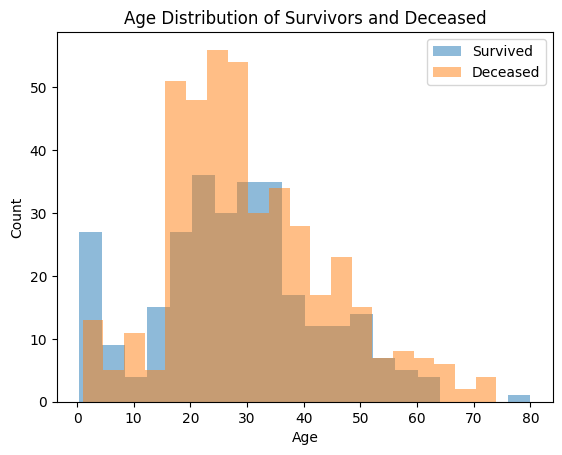

In [18]:
# Histogramme des âges des survivants
plt.hist(data[data['Survived'] == 1]['Age'], bins=20, label='Survived', alpha=0.5)

# Histogramme des âges des décès
plt.hist(data[data['Survived'] == 0]['Age'], bins=20, label='Deceased', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Survivors and Deceased')
plt.legend()
plt.show()


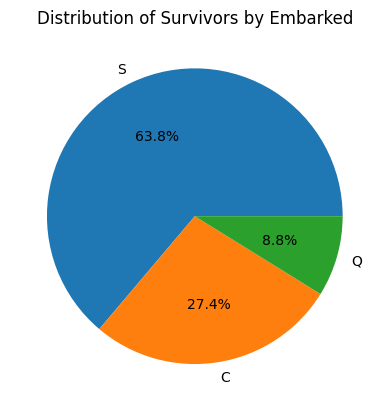

In [19]:
# Nombre de survivants par port d'embarquement
survived_by_embarked = data[data['Survived'] == 1]['Embarked'].value_counts()

# Tracé du diagramme en secteurs
plt.pie(survived_by_embarked, labels=survived_by_embarked.index, autopct='%1.1f%%')
plt.title('Distribution of Survivors by Embarked')
plt.show()


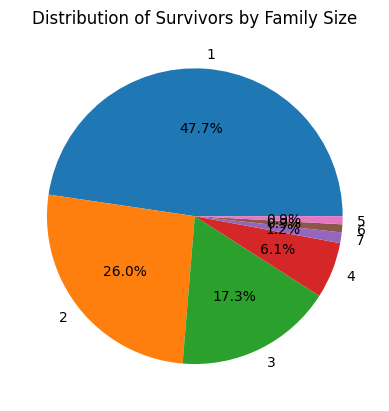

In [20]:
# Création d'une nouvelle colonne 'FamilySize' (nombre de parents/enfants à bord + 1)
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1

# Nombre de survivants par taille de famille
survived_by_family_size = data[data['Survived'] == 1]['FamilySize'].value_counts()

# Tracé du diagramme en secteurs
plt.pie(survived_by_family_size, labels=survived_by_family_size.index, autopct='%1.1f%%')
plt.title('Distribution of Survivors by Family Size')
plt.show()


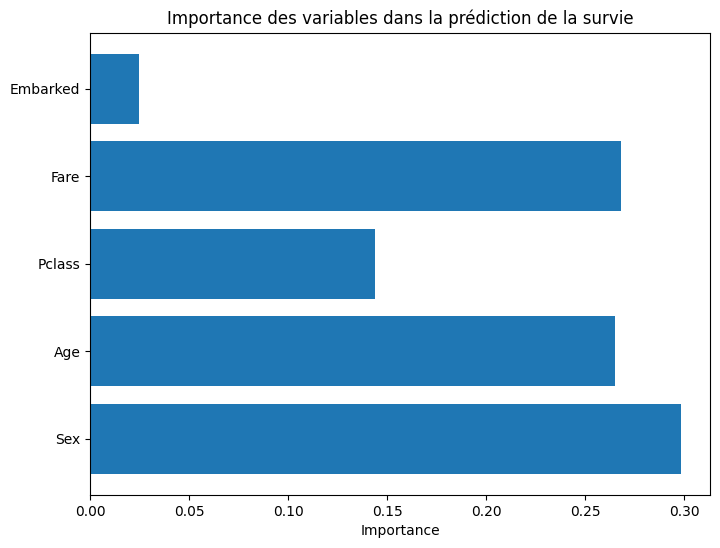

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Chargement des données
data = pd.read_csv("titanic.csv")

# Suppression des valeurs manquantes
data = data.dropna(subset=["Survived", "Sex", "Age", "Pclass", "Fare", "Embarked"])

# Conversion des variables catégorielles en variables numériques
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})
data["Embarked"] = data["Embarked"].map({"C": 0, "Q": 1, "S": 2})

# Sélection des variables d'entrée et de sortie
X = data[["Sex", "Age", "Pclass", "Fare", "Embarked"]]
y = data["Survived"]

# Construction de l'arbre de décision
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Importance des variables
importance = tree.feature_importances_
variables = X.columns

# Tracé des importances des variables
plt.figure(figsize=(8, 6))
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(range(len(importance)), variables)
plt.xlabel('Importance')
plt.title('Importance des variables dans la prédiction de la survie')
plt.show()


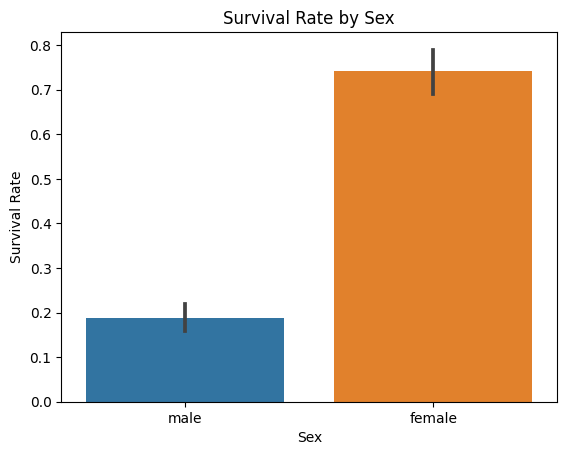

In [22]:
import seaborn as sns

# Graphique de corrélation entre le sexe et les chances de survie
sns.barplot(x='Sex', y='Survived', data=data)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.show()

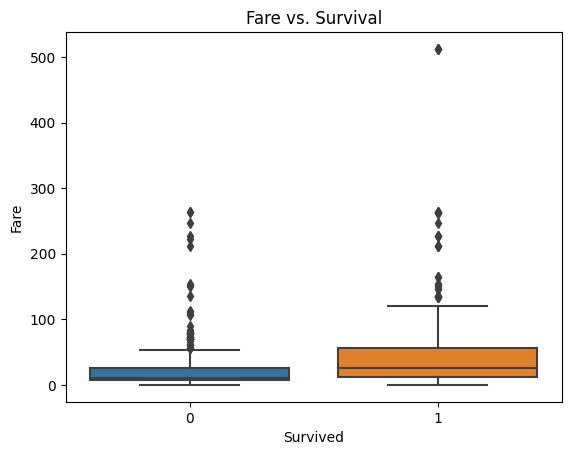

In [23]:
# Graphique de corrélation entre le prix et les chances de survie
sns.boxplot(x='Survived', y='Fare', data=data)
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Fare vs. Survival')
plt.show()
